<a href="https://colab.research.google.com/github/SimranaSinha/Masters-Project-FDA/blob/main/Simran_Sinha_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries

In [2]:
# Include Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Loading the dataset

If I want to access or save files, it will do so from this place since it will recognize it as the current folder.


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Research/Datasets/

/content/drive/MyDrive/Research/Datasets


In [ ]:
# Read the file
df = pd.read_csv('/content/drive/MyDrive/Research/Datasets/Publication_Author.csv')

In [ ]:
# Print the data
print(df)

               authors                                              title  \
0            Sachan, S  Blockchain-based auditing of legal decisions s...   
1           Ferrari, F  Observe, inspect, modify: Three conditions for...   
2           Agrawal, K  Towards Adoption of Generative AI in Organizat...   
3    Karapantelakis, A         Generative AI in mobile networks: a survey   
4           Saetra, HS         Generative AI: Here to stay, but for good?   
..                 ...                                                ...   
995       Pedersen, EM  ADuLT: An efficient and robust time-to-event GWAS   
996             Li, KD  POVNet: Image-Based Virtual Try-On Through Acc...   
997          Zhang, HT  SDEGen: learning to evolve molecular conformat...   
998             Rao, A  Assessing the Utility of ChatGPT Throughout th...   
999     Chamberlin, DE    The Active Inference Model of Coherence Therapy   

                                               journal     pub_date volume 

In [ ]:
# Define a list of search terms
search_terms = ["generative adversarial networks", "generative AI", "deep learning", "neural networks", "machine learning", "artificial intelligence", "computer vision", "natural language processing", "recommender systems", "image processing", "data generation", "synthetic data", "style transfer", "autoencoders", "variational autoencoders", "GANs", "DCGANs", "CycleGANs", "BigGANs", "ProGANs", "StyleGANs", "StyleGAN2", "image-to-image translation", "text generation", "music generation", "video generation", "3D generation", "graph generation", "sequence generation", "time-series generation", "audio generation", "speech generation", "language generation", "translation", "summarization", "text-to-speech", "synthetic data generation", "data augmentation", "data imputation", "data simulation", "data privacy", "data security", "federated learning", "multi-agent systems", "reinforcement learning", "deep reinforcement learning", "transfer learning", "few-shot learning", "one-shot learning", "zero-shot learning", "meta-learning", "unsupervised learning", "semi-supervised learning", "active learning", "online learning", "self-supervised learning", "weakly-supervised learning", "adversarial learning", "contrastive learning", "representation learning", "feature learning", "unfolding", "optimization", "computational creativity", "creative AI", "computational art", "computational design", "computational photography", "computational journalism", "computational social science", "computational economics", "computational sustainability", "computational ecology", "computational neuroscience", "computational biology", "computational chemistry", "computational physics", "computational mathematics", "computational linguistics", "computational social choice", "computational logic", "computational complexity", "computational geometry", "computational"]

In [ ]:
print(type(search_terms))

<class 'list'>


In [ ]:
search_terms_str = " ".join(search_terms)

In [ ]:
# Define the search query
query = 'generative adversarial networks OR generative AI'

# Keyword Co-Occurrence Network Analysis

Load the dataset and extract the keywords

In [ ]:
# Extract the keywords
keywords = []
for keywords_str in df['keywords']:
    if isinstance(keywords_str, str):
        keywords += keywords_str.split(';')
keywords = [kw.strip() for kw in keywords if kw.strip()]

In [ ]:
# Create a dictionary to store the keyword frequency
freq = defaultdict(int)
for keyword in keywords:
    freq[keyword] += 1

In [ ]:
# Select the top N keywords based on frequency
N = 50
top_keywords = sorted(freq, key=freq.get, reverse=True)[:N]

 Build the keyword co-occurrence network


In [ ]:
# Create an empty graph
G = nx.Graph()

In [ ]:
# Add the top N keywords as nodes
G.add_nodes_from(top_keywords)

In [ ]:
# Build the co-occurrence matrix
cooccurrence_matrix = [[0] * N for _ in range(N)]
for i, keyword1 in enumerate(top_keywords):
    for keyword2 in top_keywords[i+1:]:
        count = 0
        for keyword in keywords:
            if keyword1 in keyword and keyword2 in keyword:
                count += 1
        cooccurrence_matrix[i][top_keywords.index(keyword2)] = count


In [ ]:
# Add the edges to the graph
for i, row in enumerate(cooccurrence_matrix):
    for j, count in enumerate(row):
        if count > 0:
            G.add_edge(top_keywords[i], top_keywords[j], weight=count)

Visualize the keyword co-occurrence network

In [ ]:
# Set the size of the nodes based on the keyword frequency
node_size = [freq[keyword] * 10 for keyword in top_keywords]

In [ ]:
# Set the position of the nodes using the Fruchterman-Reingold algorithm
pos = nx.fruchterman_reingold_layout(G)

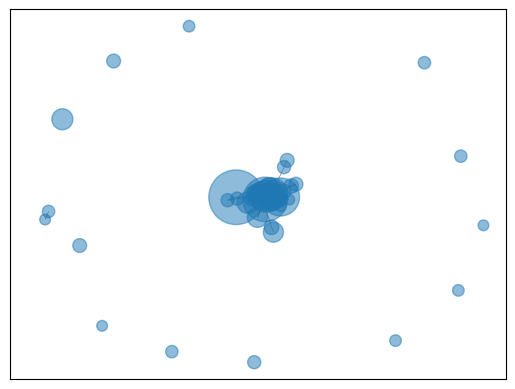

In [ ]:
# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.5)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

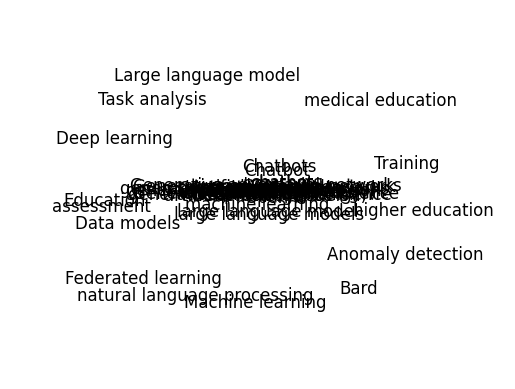

In [ ]:
# Add labels to the nodes
nx.draw_networkx_labels(G, pos, labels={keyword: keyword for keyword in top_keywords})

# Set the axis limits
plt.axis('off')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()

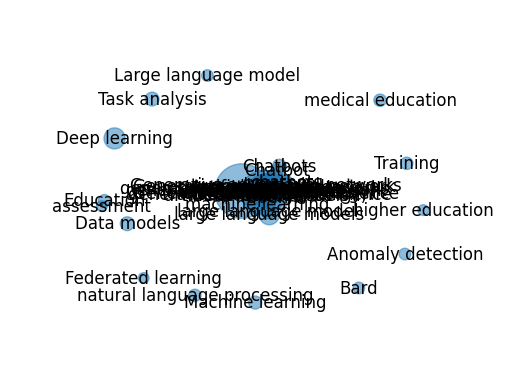

In [ ]:
# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.5)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

# Add labels to the nodes
nx.draw_networkx_labels(G, pos, labels={keyword: keyword for keyword in top_keywords})

# Set the axis limits
plt.axis('off')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()

# Identification of Key Research Themes

Calculate the weighted degree centrality of each node

In [ ]:
# Calculate the weighted degree centrality of each node
centrality = nx.degree(G, weight='weight')

Visualize the network with node size proportional to centrality

In [ ]:
# Set the size of the nodes based on the weighted degree centrality
node_size = [centrality[keyword] * 1000 for keyword in top_keywords]

In [ ]:
# Set the position of the nodes using the Fruchterman-Reingold algorithm
pos = nx.fruchterman_reingold_layout(G)

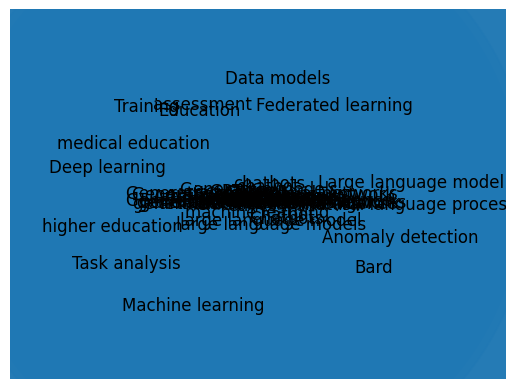

In [ ]:
# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.5)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

# Add labels to the nodes
nx.draw_networkx_labels(G, pos, labels={keyword: keyword for keyword in top_keywords})

# Set the axis limits
plt.axis('off')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()